#### Anomaly detection using Autoencoder (ECG) 
1. Import required libraries 
2. Upload / access the dataset 
3. Encoder converts it into latent representation 
4. Decoder networks convert it back to the original input
5. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

2. Upload Dataset

In [3]:
data=pd.read_csv("../datasets/ECGdataset(Ass4)/ecg_autoencoder_dataset.csv",header=None)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 5.4 MB


In [6]:
features = data.drop(140,axis=1)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [8]:
target=data[140]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: 140, dtype: int64

In [9]:
sc = StandardScaler()
features_scaled = sc.fit_transform(features)
features_scaled

array([[ 0.13015314, -0.81456844, -0.92422829, ...,  0.41209124,
         0.77172417,  0.63616554],
       [-0.72754575, -1.62378238, -1.29351275, ...,  0.76190873,
         0.87786548, -0.51593741],
       [-0.26432105, -0.65284576, -0.99660187, ...,  0.51840757,
         0.76022193,  0.2013596 ],
       ...,
       [-0.74671683, -0.4172529 , -0.27050469, ..., -1.20017695,
        -0.83057384, -0.77902953],
       [-0.24750005, -0.16584826, -0.25041586, ...,  1.0241232 ,
         0.89470289,  1.06875185],
       [-0.9452788 , -0.38686749, -0.01991038, ..., -0.86987066,
        -0.59541889,  0.01558609]])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2)

x_train = x_train[y_train == 1]

In [30]:
x_train.shape

(2361, 140)

3.  Encoder converts it into latent representation
4. Decoder networks convert it back to the original input

In [31]:
encoder = Sequential([
    Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    # Dropout(0.1),
    Dense(16, activation='relu'),
    # Dropout(0.1),
    Dense(8, activation='relu')
])
decoder = Sequential([
    Dense(16, activation='relu', input_shape=(8,)),
    # Dropout(0.1),
    Dense(32, activation='relu'),
    # Dropout(0.1),
    Dense(x_train.shape[1], activation='linear')
])

model = Sequential([
    encoder,
    decoder
])

c:\Users\dsb71\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [32]:
# model = Autoencoder(output_units=x_train.shape[1])

model.compile(loss='mse', optimizer='adam')
epochs=20

h = model.fit(x_train, x_train, epochs = epochs, batch_size=30, validation_data=(x_test, x_test), shuffle=True)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.7467 - val_loss: 0.8270
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3512 - val_loss: 0.6995
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2258 - val_loss: 0.6764
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2059 - val_loss: 0.6618
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2132 - val_loss: 0.6452
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1950 - val_loss: 0.6355
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1706 - val_loss: 0.5817
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1828 - val_loss: 0.5412
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1527 - val_loss: 0.5241
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1546 - val_loss: 0.5042
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1610 - val_loss: 0.5020
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1503 - val_lo

In [39]:
predictions = model.predict(x_test)
reconstruction_error = np.mean(np.power(x_test - predictions, 2), axis=1)
threshold = np.percentile(reconstruction_error, 90)
anomalies = reconstruction_error > threshold

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
print(f"Threshold : {threshold}")
print(f"Anomalies : {np.sum(anomalies)}")

Threshold : 0.9304970054137762
Anomalies : 100


In [41]:
np.sum(y_train == 1)

2361

<Axes: >

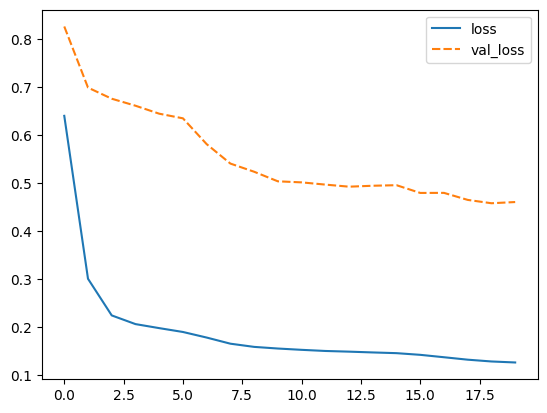

In [42]:
import seaborn as sns
sns.lineplot(h.history)

In [43]:
print(threshold)

0.9304970054137762


In [44]:
print(f'No of anomalies : {np.sum(anomalies)}')

No of anomalies : 100


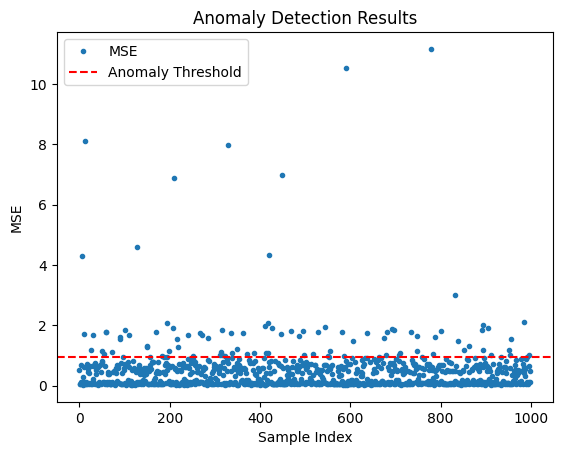

In [45]:
plt.plot(reconstruction_error, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()